In [1]:
# Importing libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [2]:
#Create a path to where your data is stored.
path = r'/Users/marika/Datasets'

#Import data
df_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-weather-prediction-dataset-processed.csv')

In [3]:
df_weather

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [4]:
#Import data
pleasant_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [5]:
pleasant_weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Dropping unneeded columns
X = df_weather.drop(['DATE', 'MONTH'], axis=1)
y = pleasant_weather.drop(['DATE'], axis=1)

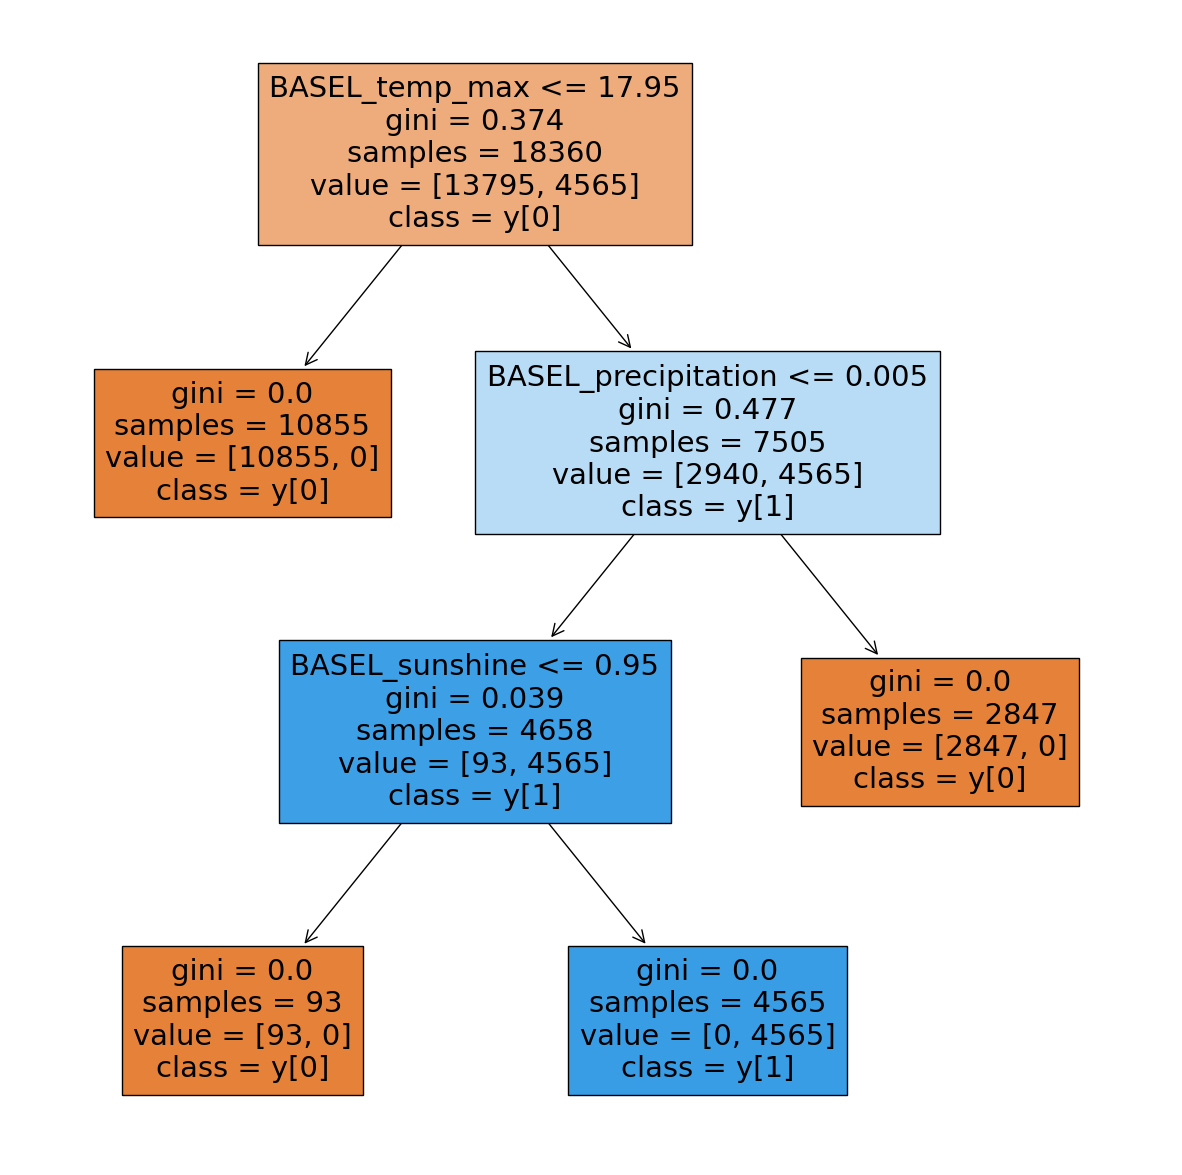

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Define X and y
X = df_weather.drop(['DATE', 'MONTH'], axis=1)
y = pleasant_weather['BASEL_pleasant_weather']  # Ensure this is the correct column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Decision Tree model
df_weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
df_weather_dt.fit(X_train, y_train)

# Plot the Decision Tree
figure(figsize=(15,15))
plot_tree(df_weather_dt, filled=True, feature_names=X.columns, class_names=True)
plt.show()

In [12]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# Print the first 10 rows of the scaled training data
print(X_train_sc[:10])

[[ 0.66612347 -0.03017047 -0.34557088 ...  1.57377387  1.43848507
   1.5088298 ]
 [-1.41063437 -0.03017047 -1.25115184 ...  1.03425303  1.22000474
   0.73505572]
 [-0.16457967 -0.03017047  0.74112628 ...  1.03425303  1.05614448
   0.87834722]
 ...
 [-2.24133751 -0.03017047  0.83168437 ...  0.10507825  0.2914633
  -0.12469326]
 [ 0.66612347 -0.03017047 -0.79836136 ... -0.01481527 -0.00894716
  -0.01006006]
 [ 0.2507719   1.07355033  0.92224247 ... -0.01481527 -0.00894716
  -0.01006006]]


In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# Define and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
mlp.fit(X_train_sc, y_train)

# Optionally, evaluate the model
train_accuracy = mlp.score(X_train_sc, y_train)
test_accuracy = mlp.score(X_test_sc, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9875272331154684
Testing Accuracy: 0.9714596949891068
